# Credit Card Fraud Detection 

## Identify fraudulent credit card transactions.
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

### Download the data 
You can find this dataset in the following link: [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

## 1. Defining the problem statement

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

### Columns  
`Time` - Number of seconds elapsed between this transaction and the first transaction in the dataset.  
`V1-V28` - may be result of a PCA Dimensionality reduction to protect user identities and sensitive features.  
`Amount` - Transaction amount.  
`Class` - 1 for fraudulent transactions, 0 otherwise.  

## 2. We will need to download all relevant dependencies we need. 

as well as upload train and test datasets 

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading in the data

After we have downloaded the data, we need to get it into the notebook. We will import our dataset from a .csv file as a Pandas DataFrame. Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.

In [7]:
# load the data using pandas
data = pd.read_csv(r'data/creditcard.csv')

In [8]:
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [10]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

(2848, 31)
                Time           V1           V2           V3           V4  \
count    2848.000000  2848.000000  2848.000000  2848.000000  2848.000000   
mean    95248.251053     0.011750    -0.039351     0.018920     0.007964   
std     47644.314961     2.063431     1.844449     1.485247     1.410786   
min       128.000000   -40.470142   -39.818310   -17.474421    -4.459901   
25%     54624.250000    -0.887886    -0.620759    -0.854662    -0.783289   
50%     84653.000000     0.000171     0.041432     0.173164    -0.018219   
75%    140459.500000     1.323619     0.797554     1.058288     0.724953   
max    172719.000000     2.411499     9.770570     3.924953    11.427809   

                V5           V6           V7           V8           V9  ...  \
count  2848.000000  2848.000000  2848.000000  2848.000000  2848.000000  ...   
mean     -0.024247     0.030677     0.033694     0.029033     0.016412  ...   
std       1.509010     1.405890     1.314645     1.143569     1.068

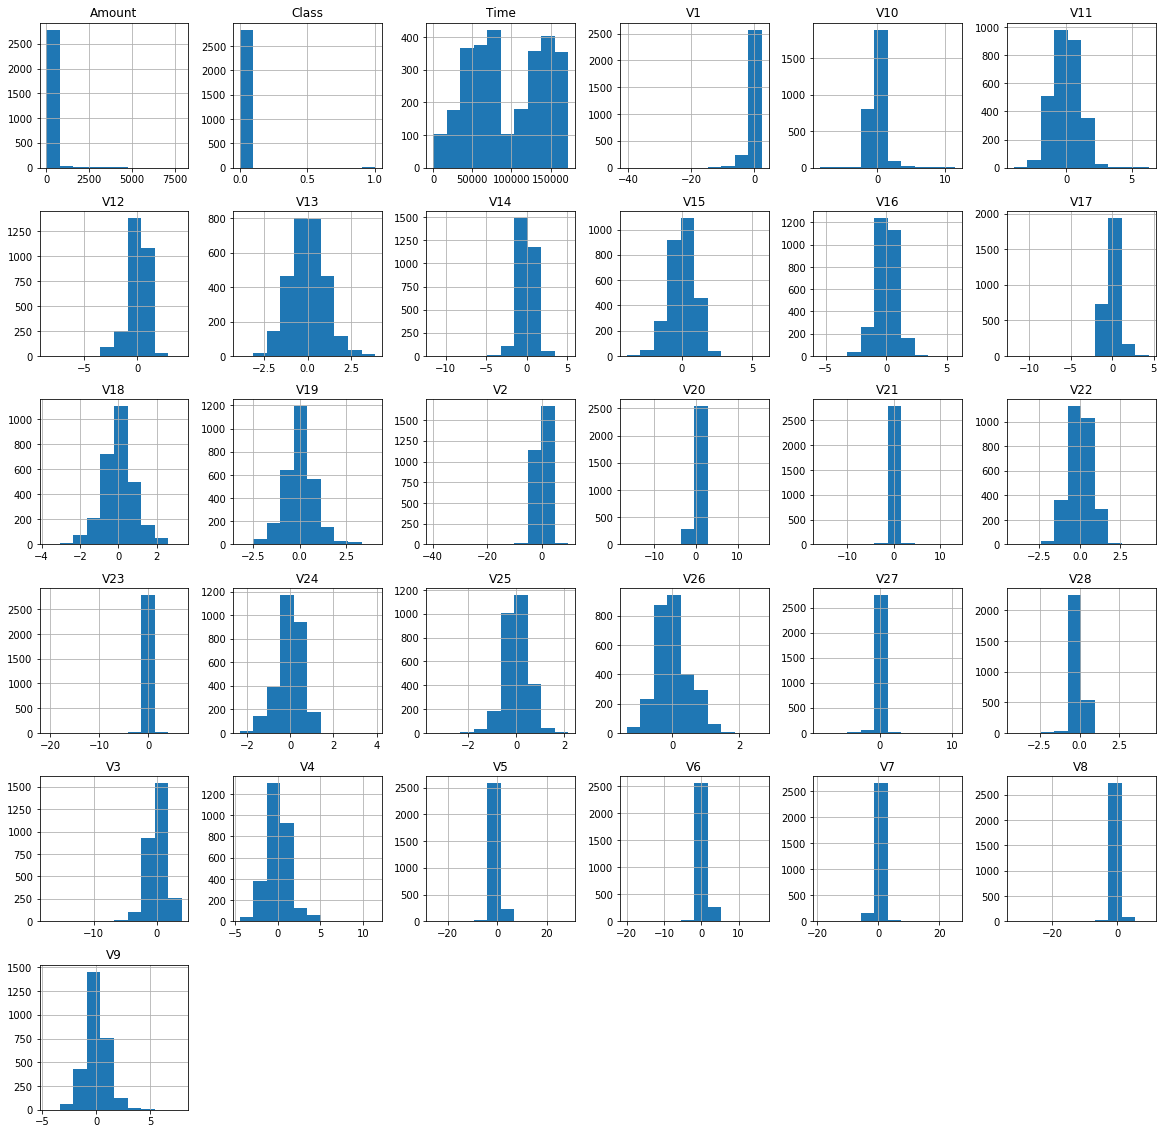

In [11]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [12]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017587055926837848
Fraud Cases: 5
Valid Transactions: 2843


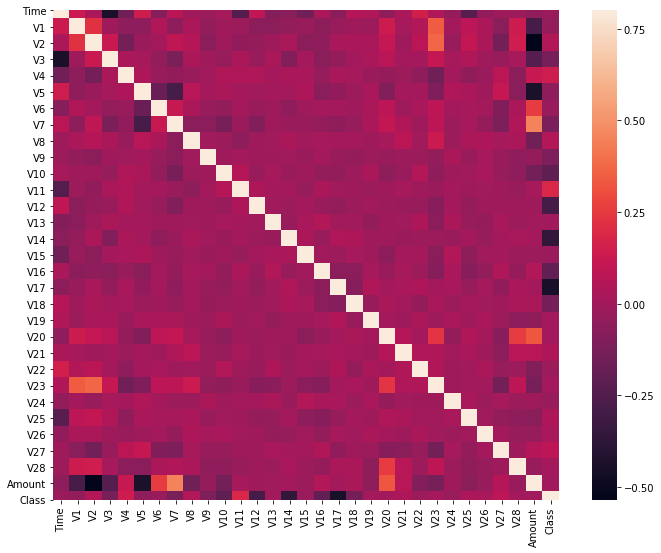

In [13]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()